In [2]:
import pandas as pd, matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np

In [5]:
import statsmodels.api as sm

In [6]:
df = sm.datasets.macrodata.load_pandas().data

In [7]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [8]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [9]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [10]:
df.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [12]:
# Setting Year column as TimeSeries Index rather leaving it as just a column

index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', end = '2009Q3'))

In [13]:
df.index = index

In [14]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


<AxesSubplot:>

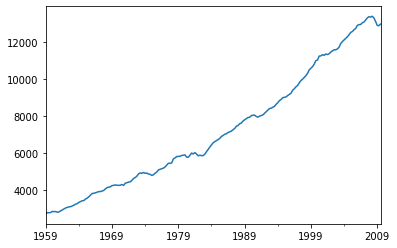

In [15]:
df.realgdp.plot()

In [17]:
# The Hodrick–Prescott filter (also known as Hodrick–Prescott decomposition) is a mathematical tool used in macroeconomics, 
# especially in real business cycle theory, to remove the cyclical component of a time series from raw data. 
# It is used to obtain a smoothed-curve representation of a time series, one that is more sensitive to 
# long-term than to short-term fluctuations.

result = sm.tsa.filters.hpfilter(df.realgdp)

<AxesSubplot:>

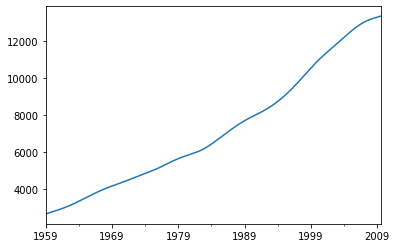

In [27]:
result[1].plot()

In [28]:
# Or let's do tuple unpacking

gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df.realgdp)

In [31]:
df['trend'] = gdp_trend

<AxesSubplot:>

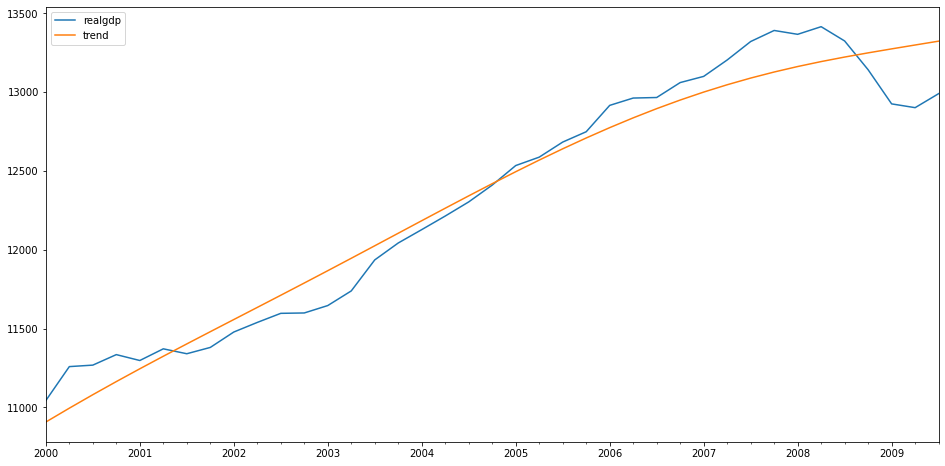

In [40]:
df[['realgdp', 'trend']]['2000-01-01':].plot(figsize = (16,8))

In [43]:
airline = pd.read_csv('airline_passengers.csv', index_col='Month')

In [50]:
airline.dropna(inplace = True)
# Got rid of missing values

In [51]:
airline.index = pd.to_datetime(airline.index)

In [54]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [57]:
airline

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [58]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [60]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

<AxesSubplot:xlabel='Month'>

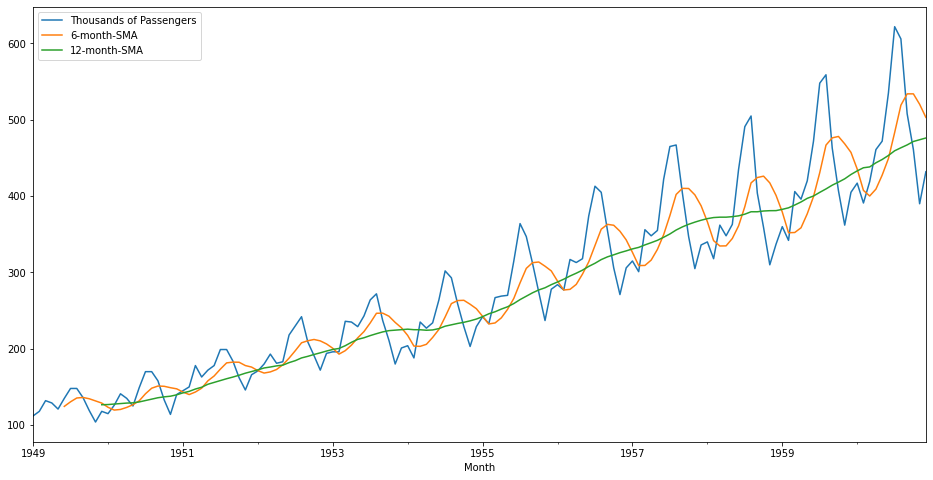

In [63]:
airline.plot(figsize=(16,8))

In [64]:
# Now let's try EWMA

airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

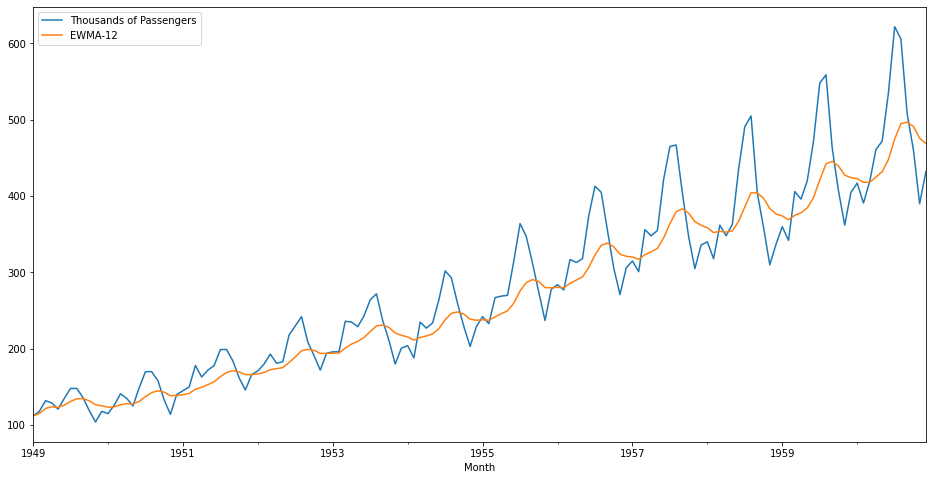

In [67]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(16,8))

In [ ]:
# ETS Code along

In [68]:
df_airline = pd.read_csv('airline_passengers.csv',index_col="Month")

<AxesSubplot:xlabel='Month'>

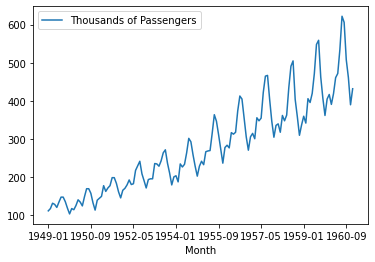

In [70]:
df_airline.plot()


In [71]:
df_airline.dropna(inplace=True)

In [72]:
df_airline.index = pd.to_datetime(df_airline.index)

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [75]:
result = seasonal_decompose(df_airline['Thousands of Passengers'], model = 'multiplicative')
# We chose multiplicative model because the trend looks less linear and more exponential 
# In other case use additive model

In [76]:
result

<AxesSubplot:title={'center':'Seasonality'}, xlabel='Month'>

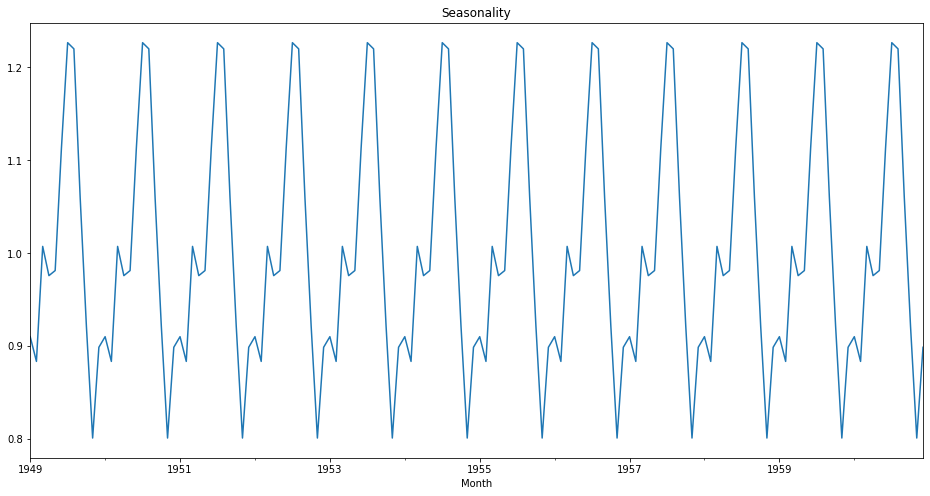

In [81]:
result.seasonal.plot(figsize=(16,8), title= 'Seasonality')

<AxesSubplot:title={'center':'Trend'}, xlabel='Month'>

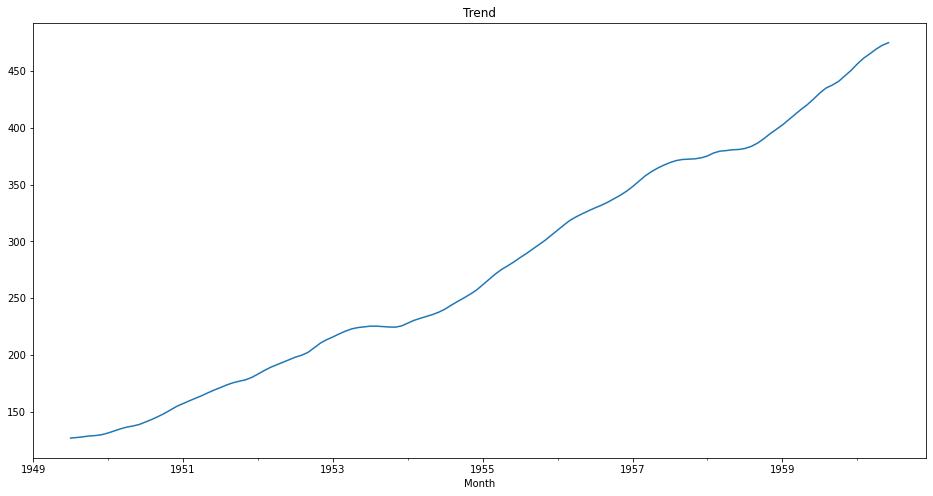

In [82]:
result.trend.plot(figsize=(16,8), title= 'Trend')

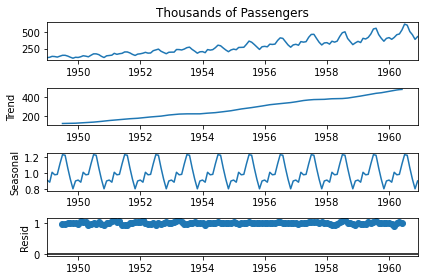

In [88]:
fig = result.plot()

In [89]:
# ARIMA Code along

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
import statsmodels.api as sm

In [94]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv', index_col='Month')

In [99]:
df.dropna(inplace=True)

In [101]:
df.index = pd.to_datetime(df.index)

In [107]:
df.columns = ['Milk in Pounds per Cow']

In [110]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [112]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


In [113]:
# Step 2 - Visualisation

<AxesSubplot:xlabel='Month'>

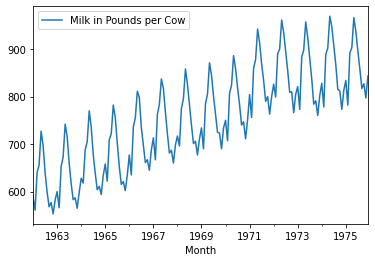

In [114]:
df.plot()

In [116]:
# Looks like there is some seasonality and trend. Let's do ETS
from statsmodels.tsa.seasonal import seasonal_decompose

In [127]:
result = seasonal_decompose(df['Milk in Pounds per Cow'])

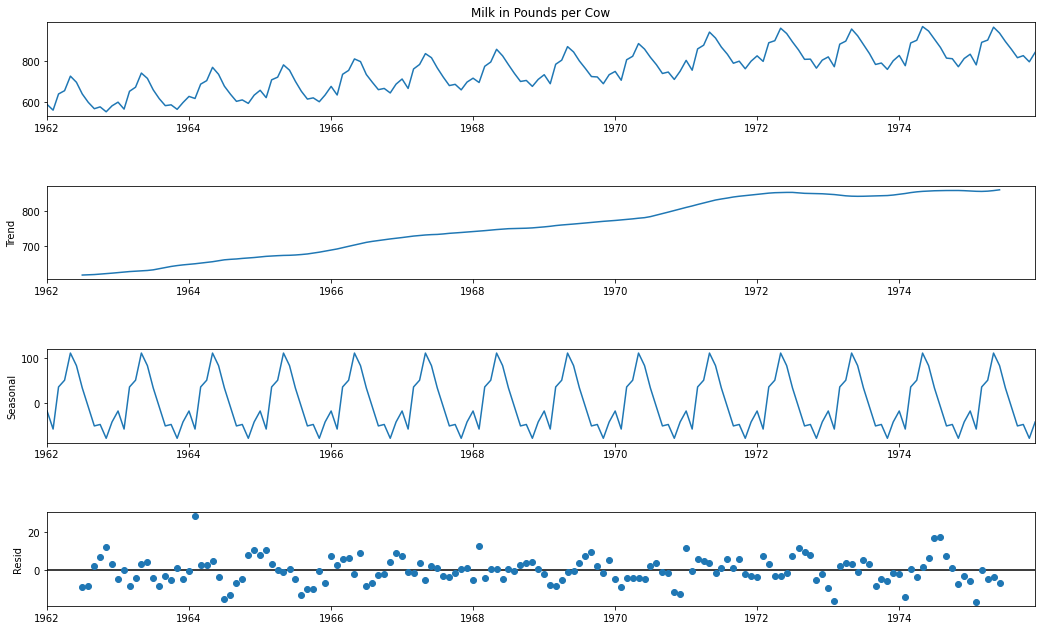

In [134]:
fig = result.plot()
fig.set_size_inches(16,10)

In [119]:
# ------------------------------

In [120]:
time_series = df['Milk in Pounds per Cow']

In [121]:
type(time_series)

pandas.core.series.Series

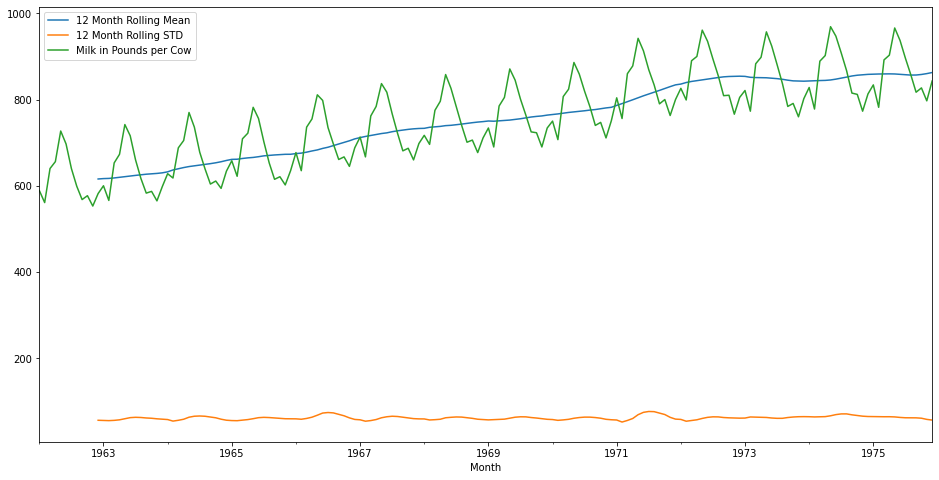

In [126]:
time_series.rolling(12).mean().plot(label = '12 Month Rolling Mean', figsize=(16,8))
time_series.rolling(12).std().plot(label = '12 Month Rolling STD')
time_series.plot()
plt.legend()

In [135]:
# If ADF Statistic < Critical Value => Time Series is Stationary! (Just from a YT Video)

In [137]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [138]:
# In ADF, Ho (Null Hypothesis) is that the data is non-stationary

In [139]:
from statsmodels.tsa.stattools import adfuller

In [140]:
result = adfuller(df['Milk in Pounds per Cow'])

In [141]:
result

(-1.3038115874221312,
 0.6274267086030308,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [152]:
def adfcheck(timeseries):
    result = adfuller(timeseries)
    print('Augmented Dickey Fuller Test')
    print('----------------------------\n')
    labels = ['ADF Test Statistic', 'p-Value', '# of lags', 'Num of observations used']
    
    for value, label in zip(result,labels):
        print(label + ' : ' + str(value))
    # If p-Value <= 0.05, Stationary Data
    if result[1] <= 0.05:
        print('\nStrong evidence against Null Hypothesis')
        print('Reject Null Hypothesis')
        print('Data has no unit root and is Stationary')
    else:
        print('\nWeak evidence against Null Hypothesis')
        print('Failed to reject Null Hypothesis')
        print('Data has a unit root and is Non-Stationary')

In [153]:
adfcheck(df['Milk in Pounds per Cow'])

Augmented Dickey Fuller Test
----------------------------

ADF Test Statistic : -1.3038115874221312
p-Value : 0.6274267086030308
# of lags : 13
Num of observations used : 154

Weak evidence against Null Hypothesis
Failed to reject Null Hypothesis
Data has a unit root and is Non-Stationary


In [155]:
# Differencing

In [156]:
df['1st Diff'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1)

<AxesSubplot:xlabel='Month'>

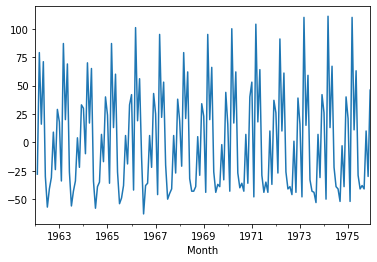

In [159]:
df['1st Diff'].plot()

In [161]:
adfcheck(df['1st Diff'].dropna())

Augmented Dickey Fuller Test
----------------------------

ADF Test Statistic : -3.054995558653062
p-Value : 0.03006800400178634
# of lags : 14
Num of observations used : 152

Strong evidence against Null Hypothesis
Reject Null Hypothesis
Data has no unit root and is Stationary


In [162]:
# In case the above result was Non-Stationary. We would have done 2nd difference
# Let's do it anyway just to learn

In [163]:
df['2nd diff'] = df['1st Diff'] - df['1st Diff'].shift(1)

In [165]:
adfcheck(df['2nd diff'].dropna())

Augmented Dickey Fuller Test
----------------------------

ADF Test Statistic : -14.327873645603308
p-Value : 1.1126989332084267e-26
# of lags : 11
Num of observations used : 154

Strong evidence against Null Hypothesis
Reject Null Hypothesis
Data has no unit root and is Stationary


<AxesSubplot:xlabel='Month'>

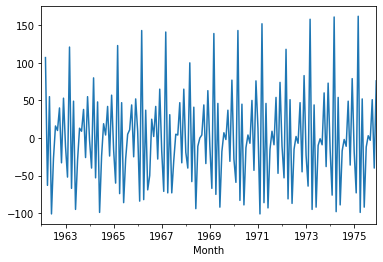

In [166]:
df['2nd diff'].plot()

In [167]:
df['Seasonal Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shiftft(12)

<AxesSubplot:xlabel='Month'>

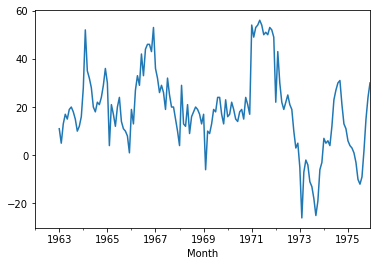

In [168]:
df['Seasonal Difference'].plot()

In [169]:
adfcheck(df['Seasonal Difference'].dropna())

Augmented Dickey Fuller Test
----------------------------

ADF Test Statistic : -2.335419314359398
p-Value : 0.1607988052771135
# of lags : 12
Num of observations used : 143

Weak evidence against Null Hypothesis
Failed to reject Null Hypothesis
Data has a unit root and is Non-Stationary


In [170]:
df['Seasonal 1st diff'] = df['1st Diff'] - df['1st Diff'].shift(12)

<AxesSubplot:xlabel='Month'>

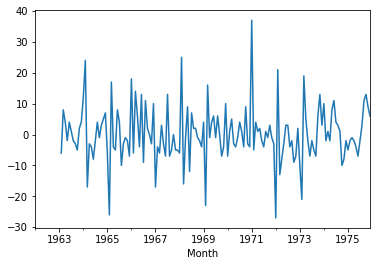

In [171]:
df['Seasonal 1st diff'].plot()

In [172]:
adfcheck(df['Seasonal 1st diff'].dropna())

Augmented Dickey Fuller Test
----------------------------

ADF Test Statistic : -5.038002274921986
p-Value : 1.8654234318788024e-05
# of lags : 11
Num of observations used : 143

Strong evidence against Null Hypothesis
Reject Null Hypothesis
Data has no unit root and is Stationary


In [173]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [176]:
df.head()

,Milk in Pounds per Cow,1st Diff,2nd diff,Seasonal Difference,Seasonal 1st diff
Month,,,,,
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN


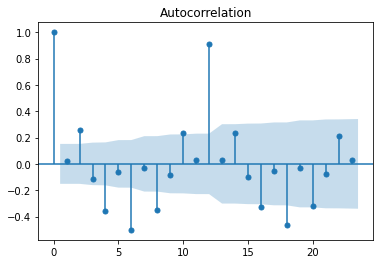

In [175]:
fig_first = plot_acf(df['1st Diff'].dropna())

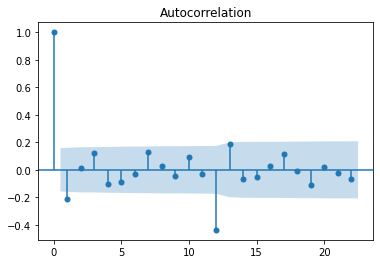

In [177]:
fig_seasonal_first = plot_acf(df['Seasonal 1st diff'].dropna())

In [178]:
from pandas.plotting import autocorrelation_plot

f:\python\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

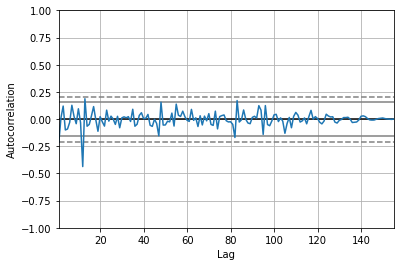

In [181]:
autocorrelation_plot(df['Seasonal 1st diff'].dropna())

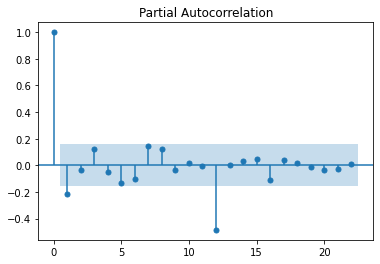

In [183]:
result = plot_pacf(df['Seasonal 1st diff'].dropna())

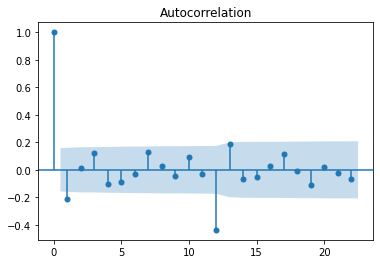

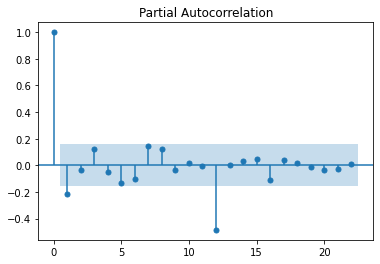

In [186]:
plot_acf(df['Seasonal 1st diff'].dropna())
a = plot_pacf(df['Seasonal 1st diff'].dropna())

In [187]:
from statsmodels.tsa.arima_model import ARIMA

In [188]:
model = sm.tsa.statespace.SARIMAX(df['Milk in Pounds per Cow'], order = (0,1,0), seasonal_order=(1,1,1,12))

f:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
f:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [189]:
results = model.fit()

In [190]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Fri, 13 Aug 2021   AIC                           1074.131
Time:                                      20:41:56   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

In [191]:
results.resid #Residual Values 

Month
1962-01-01    589.000000
1962-02-01    -28.000000
1962-03-01     79.000000
1962-04-01     16.000000
1962-05-01     71.000000
                 ...    
1975-08-01      2.641352
1975-09-01      8.158628
1975-10-01      7.676815
1975-11-01      6.572470
1975-12-01      5.936378
Length: 168, dtype: float64

<AxesSubplot:xlabel='Month'>

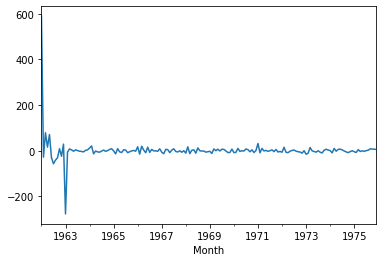

In [192]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

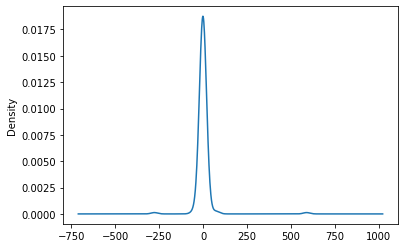

In [193]:
results.resid.plot(kind = 'kde') #Kernel Density Estimation (to see the distribution of the errors)
# We see errors are distributed around zero, which is good

<AxesSubplot:xlabel='Month'>

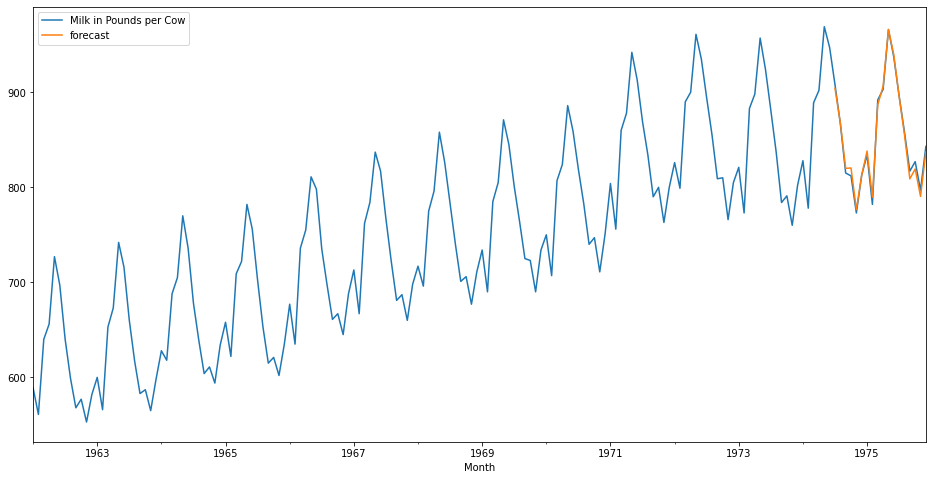

In [197]:
df['forecast'] = results.predict(start = 150, end = 168)
df[['Milk in Pounds per Cow', 'forecast']].plot(figsize=(16,8))

In [198]:
df.tail()

,Milk in Pounds per Cow,1st Diff,2nd diff,Seasonal Difference,Seasonal 1st diff,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358648
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841372
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323185
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427530
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063622


In [200]:
from pandas.tseries.offsets import DateOffset

In [201]:
futuredates = [df.index[-1] + DateOffset(months = x) for x in range(1,36)]

In [202]:
futuredates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00'),
 Timestamp('1977-12-01 00:00:00'),
 Timestamp('1978-01-01 00:00:00'),
 Timestamp('1978-02-01 00:00:00'),
 Timestamp('1978-03-01 00:00:00'),
 Timestamp('1978-04-01 00:00:00'),
 Timestamp('1978-05-

In [203]:
future_df = pd.DataFrame(index= futuredates, columns=df.columns)

In [205]:
future_df.head()

,Milk in Pounds per Cow,1st Diff,2nd diff,Seasonal Difference,Seasonal 1st diff,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
final_df = pd.concat([df, future_df])

In [208]:
final_df

,Milk in Pounds per Cow,1st Diff,2nd diff,Seasonal Difference,Seasonal 1st diff,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1978-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1978-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1978-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1978-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
final_df['forecast'] = results.predict(start = 167, end = 200)

In [217]:
final_df.tail()

,Milk in Pounds per Cow,1st Diff,2nd diff,Seasonal Difference,Seasonal 1st diff,forecast
1978-07-01,NaN,NaN,NaN,NaN,NaN,970.004759
1978-08-01,NaN,NaN,NaN,NaN,NaN,930.394458
1978-09-01,NaN,NaN,NaN,NaN,NaN,884.346050
1978-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1978-11-01,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

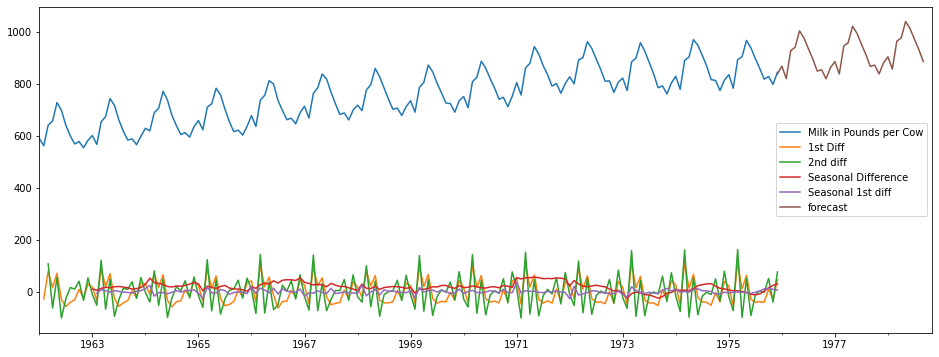

In [218]:
final_df.plot(figsize=(16,6))

<AxesSubplot:title={'center':'Milk Forecast'}>

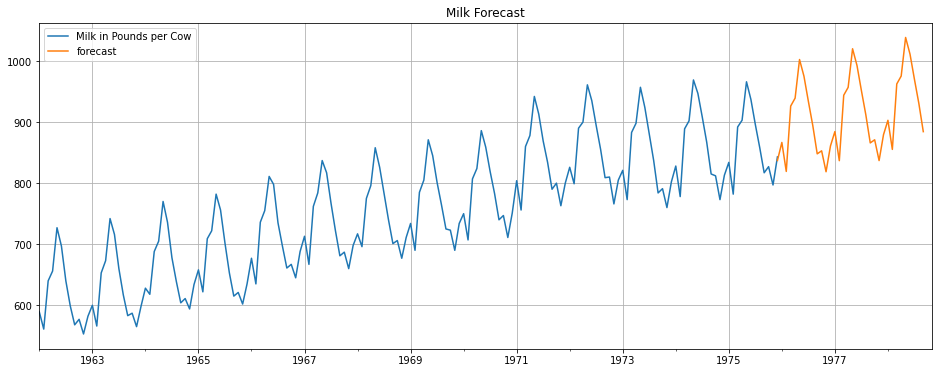

In [224]:
final_df[['Milk in Pounds per Cow', 'forecast']].plot(figsize=(16,6), grid = 1, title = 'Milk Forecast')